<a href="https://colab.research.google.com/github/Uttam580/New_learning-/blob/master/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving R. Data - 1 tab.xlsx to R. Data - 1 tab.xlsx


In [2]:
ls

'R. Data - 1 tab.xlsx'   sample_data/


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Non standard missing values 
missing_values = ["n/a", "na", "--"]

In [14]:
df = pd.read_excel('R. Data - 1 tab.xlsx',na_values = missing_values)
df.head()

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,Starter,GOBI MANCHURIAN,14.0,1
1,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,Starter,TASTY FLATBREAD,11.0,1
2,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,VEGETABLE SPECIALS,SARSON DA SAAG,15.0,1
3,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,VEGETABLE SPECIALS,PANEER VINDALOO,16.0,1
4,YALEV6B6K3,01/01/2019 11:30AM,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4.0,BREADS,GARLIC NAAN,3.5,2


In [16]:
df.shape

(200, 15)

**EDA**

In [0]:
#checking null values
df.isnull().sum().sort_values(ascending = True)

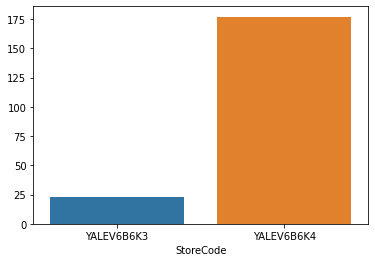

In [24]:
# checking store wise sale 
sns.barplot(df.groupby('StoreCode')['StoreCode'].count().index ,df.groupby('StoreCode')['StoreCode'].count().values )

from above plot we can see that store id YALEV6B6K4 had more customers than YALEV6B6K3)

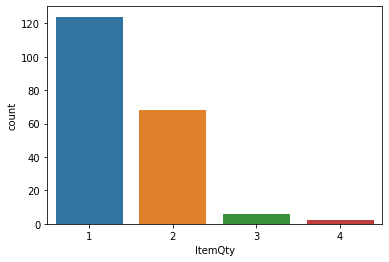

In [28]:
sns.countplot(x= 'ItemQty', data= df)

from above graph we found that most of people  ordered only one quantity.This is may be due to only couples would prefer this hotel or may be online order for single person. 


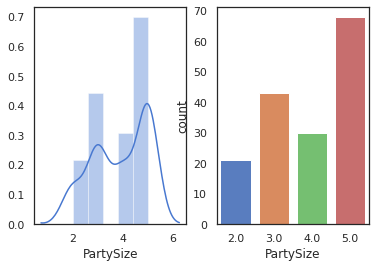

In [41]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2,)
sns.distplot(df.PartySize, ax=axes[0])
sns.countplot(x='PartySize', data=df , ax=axes[1])

from above plot we can see that most of people came into hotel in size of 5 .

In [0]:
#there is discripency in dataset (tuesday is weekday ) and (wednesday is weekend)  but as we told that this data is for friday(weeekday) and saturady(weekend). 
# so ignoring day column 

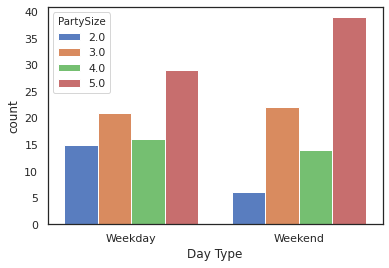

In [43]:
sns.countplot(x= 'Day Type',hue= 'PartySize',data= df)

we have more people on weekend as compared to weekday . while expanding the data we will give more weight on weekned.

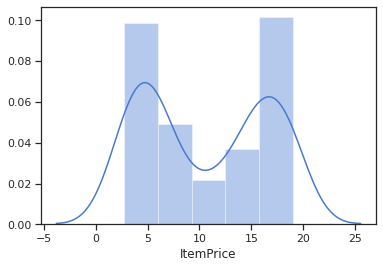

In [51]:
sns.distplot(df.ItemPrice) 

most Itemprices are ranging between approx  (2-6) and (15-20) 

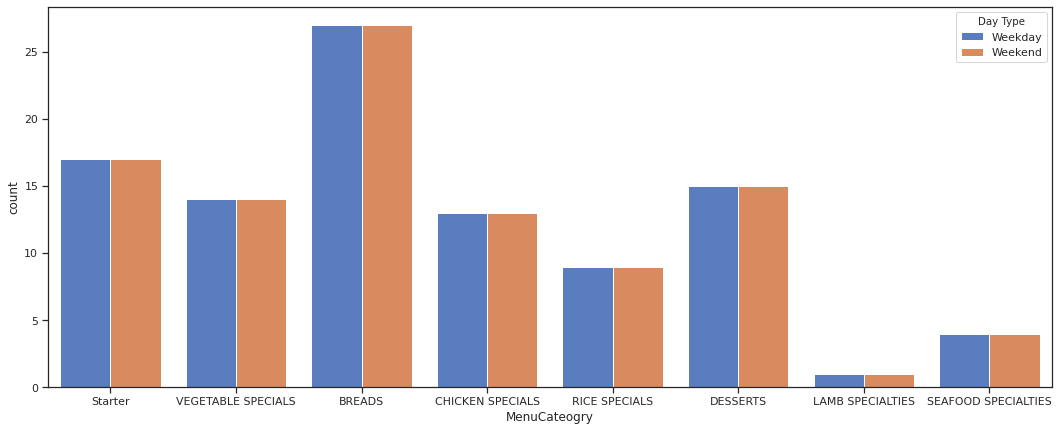

In [81]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18,7)
sns.countplot(x='MenuCateogry',hue= 'Day Type',data=df,)

from above visaulization we can see that is no effect on menucategory on weekday and weekend. and BREADS are  sold out more than other menucategory item . 

In [54]:
df.MenuCateogry.value_counts() #checking Menucategory

BREADS                 54
Starter                34
DESSERTS               30
VEGETABLE SPECIALS     28
CHICKEN SPECIALS       26
RICE SPECIALS          18
SEAFOOD SPECIALTIES     8
LAMB SPECIALTIES        2
Name: MenuCateogry, dtype: int64

In [89]:
df[df.MenuCateogry=="BREADS"].MenuItem.value_counts()

GARLIC NAAN      20
NAAN             10
TANDOORI ROTI     8
ONION KULCHA      8
LACHA PARATHA     4
SPINACH NAAN      2
ALOO PARATHA      2
Name: MenuItem, dtype: int64

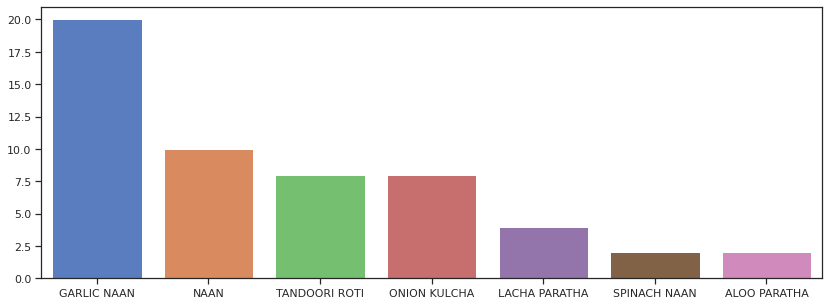

In [67]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14,5)
sns.barplot(x=df[df.MenuCateogry=="BREADS"].MenuItem.value_counts().index,y= df[df.MenuCateogry=="BREADS"].MenuItem.value_counts().values)

In [74]:
df[df.MenuCateogry=="Starter"].MenuItem.value_counts()

VEGETABLE PAKORA                  6
TASTY FLATBREAD                   4
COCKTAIL CHICKEN SAMOSAS          4
GOBI MANCHURIAN                   4
SPICY CHICKEN BITES               2
MASALA CHICKEN WINGS              2
FISH PAKORA                       2
TASTY SLIDERS : CHICKEN PANEER    2
SHRIMP STRIPS                     2
CHAAT PAPRI                       2
VEGETABLE SAMOSA                  2
HARA BHARA KABOB                  2
Name: MenuItem, dtype: int64

In [75]:
df[df.MenuCateogry=="DESSERTS"].MenuItem.value_counts()

GULABJAMUN      8
RASMALAI        6
CARROT HALWA    6
MALPURA         6
KHEER           4
Name: MenuItem, dtype: int64

In [76]:
df[df.MenuCateogry=="VEGETABLE SPECIALS"].MenuItem.value_counts()

KADAHI PANEER       6
SARSON DA SAAG      4
MALAI KOFTA         4
PANEER VINDALOO     4
BAINGAN BARTHA      4
SHAHI PANEER        2
BHINDI DO PIAZZA    2
YELLOW DAL FRY      2
Name: MenuItem, dtype: int64

In [77]:
df[df.MenuCateogry=="CHICKEN SPECIALS"].MenuItem.value_counts()

BUTTER CHICKEN           10
CHICKEN TIKKA MASALA      4
CHICKEN KORMA             4
CHICKEN SAAG              4
COCONUT CHICKEN CURRY     4
Name: MenuItem, dtype: int64

In [78]:
df[df.MenuCateogry=="RICE SPECIALS"].MenuItem.value_counts()

RICE                                  12
CHICKEN BIRYANI                        4
TIKKA RICE BOWL : PANEER | CHICKEN     2
Name: MenuItem, dtype: int64

In [79]:
df[df.MenuCateogry=="SEAFOOD SPECIALTIES"].MenuItem.value_counts()

FISH CURRY    6
FISH KORMA    2
Name: MenuItem, dtype: int64

In [80]:
df[df.MenuCateogry=="LAMB SPECIALTIES"].MenuItem.value_counts()

KADAHI LAMB    2
Name: MenuItem, dtype: int64

In [82]:
df.PartySize.isnull().sum()#we have 38 null values in partsize . we have small dataset so instead of dropping null values we are replacing them with meadian.

38

In [84]:
df.PartySize.median() # replacing null values with median. 

4.0

In [0]:
df_new = df.fillna(df.mean()) 

In [87]:
df_new.PartySize.isnull().sum() # new_df now do not have any null values 

0

From above EDA we can conclude below points. 

1. store id YALEV6B6K4 had more customers than YALEV6B6K3

2. most of people ordered only one itemquantity(1>2>3>4)

3. most of people came into hotel in size of 5 (5>3>4>2)

4. more people on weekend as compared to weekday(Partysize is same)

5. Most ordered menu category

   BREADS                 54


(GARLIC NAAN(20)> NAAN(10)> TANDOORI ROTI/ONION KULCHA(8)> LACHA PARATH(4)> SPINACH NAAN/ALOO PARATHA(2)

   Starter                34
   
   
(VEGETABLE PAKORA(6)> TASTY FLATBREAD/COCKTAIL CHICKEN SAMOSAS/GOBI MANCHURIAN(4) >other(2))

   DESSERTS               30

(GULABJAMUN(8)> RASMALAI/CARROT HALWA/MALPURA (6)> KHEER(4))

   VEGETABLE SPECIALS     28
   
(KADAHI PANEER(6)> SARSON DA SAAG/MALAI KOFTA/PANEER VINDALOO/BAINGAN BARTHA(4) >SHAHI PANEER /BHINDI DO PIAZZA /YELLOW DAL FRY(2) )

   CHICKEN SPECIALS       26
   
(BUTTER CHICKEN(10)>CHICKEN TIKKA MASALA/CHICKEN KORMA /CHICKEN SAAG/COCONUT CHICKEN CURRY(4))

   RICE SPECIALS          18


(RICE(12) > CHICKEN BIRYANI(4)>TIKKA RICE BOWL : PANEER | CHICKEN)(2)

   SEAFOOD SPECIALTIES     8
   

(FISH CURRY(6) >FISH KORMA (2))

   LAMB SPECIALTIES        2
  
  (KADAHI LAMB(2))

**Simulating new dataset for next six months **